# Parametric Tests

## Parametric testing of the amount of funds sent to the project via a continuous funding module.

In [1]:
import sys
sys.path.append('../')

### cadCAD Specification Diagram

In [2]:
# For displaying image files
from IPython.display import Image

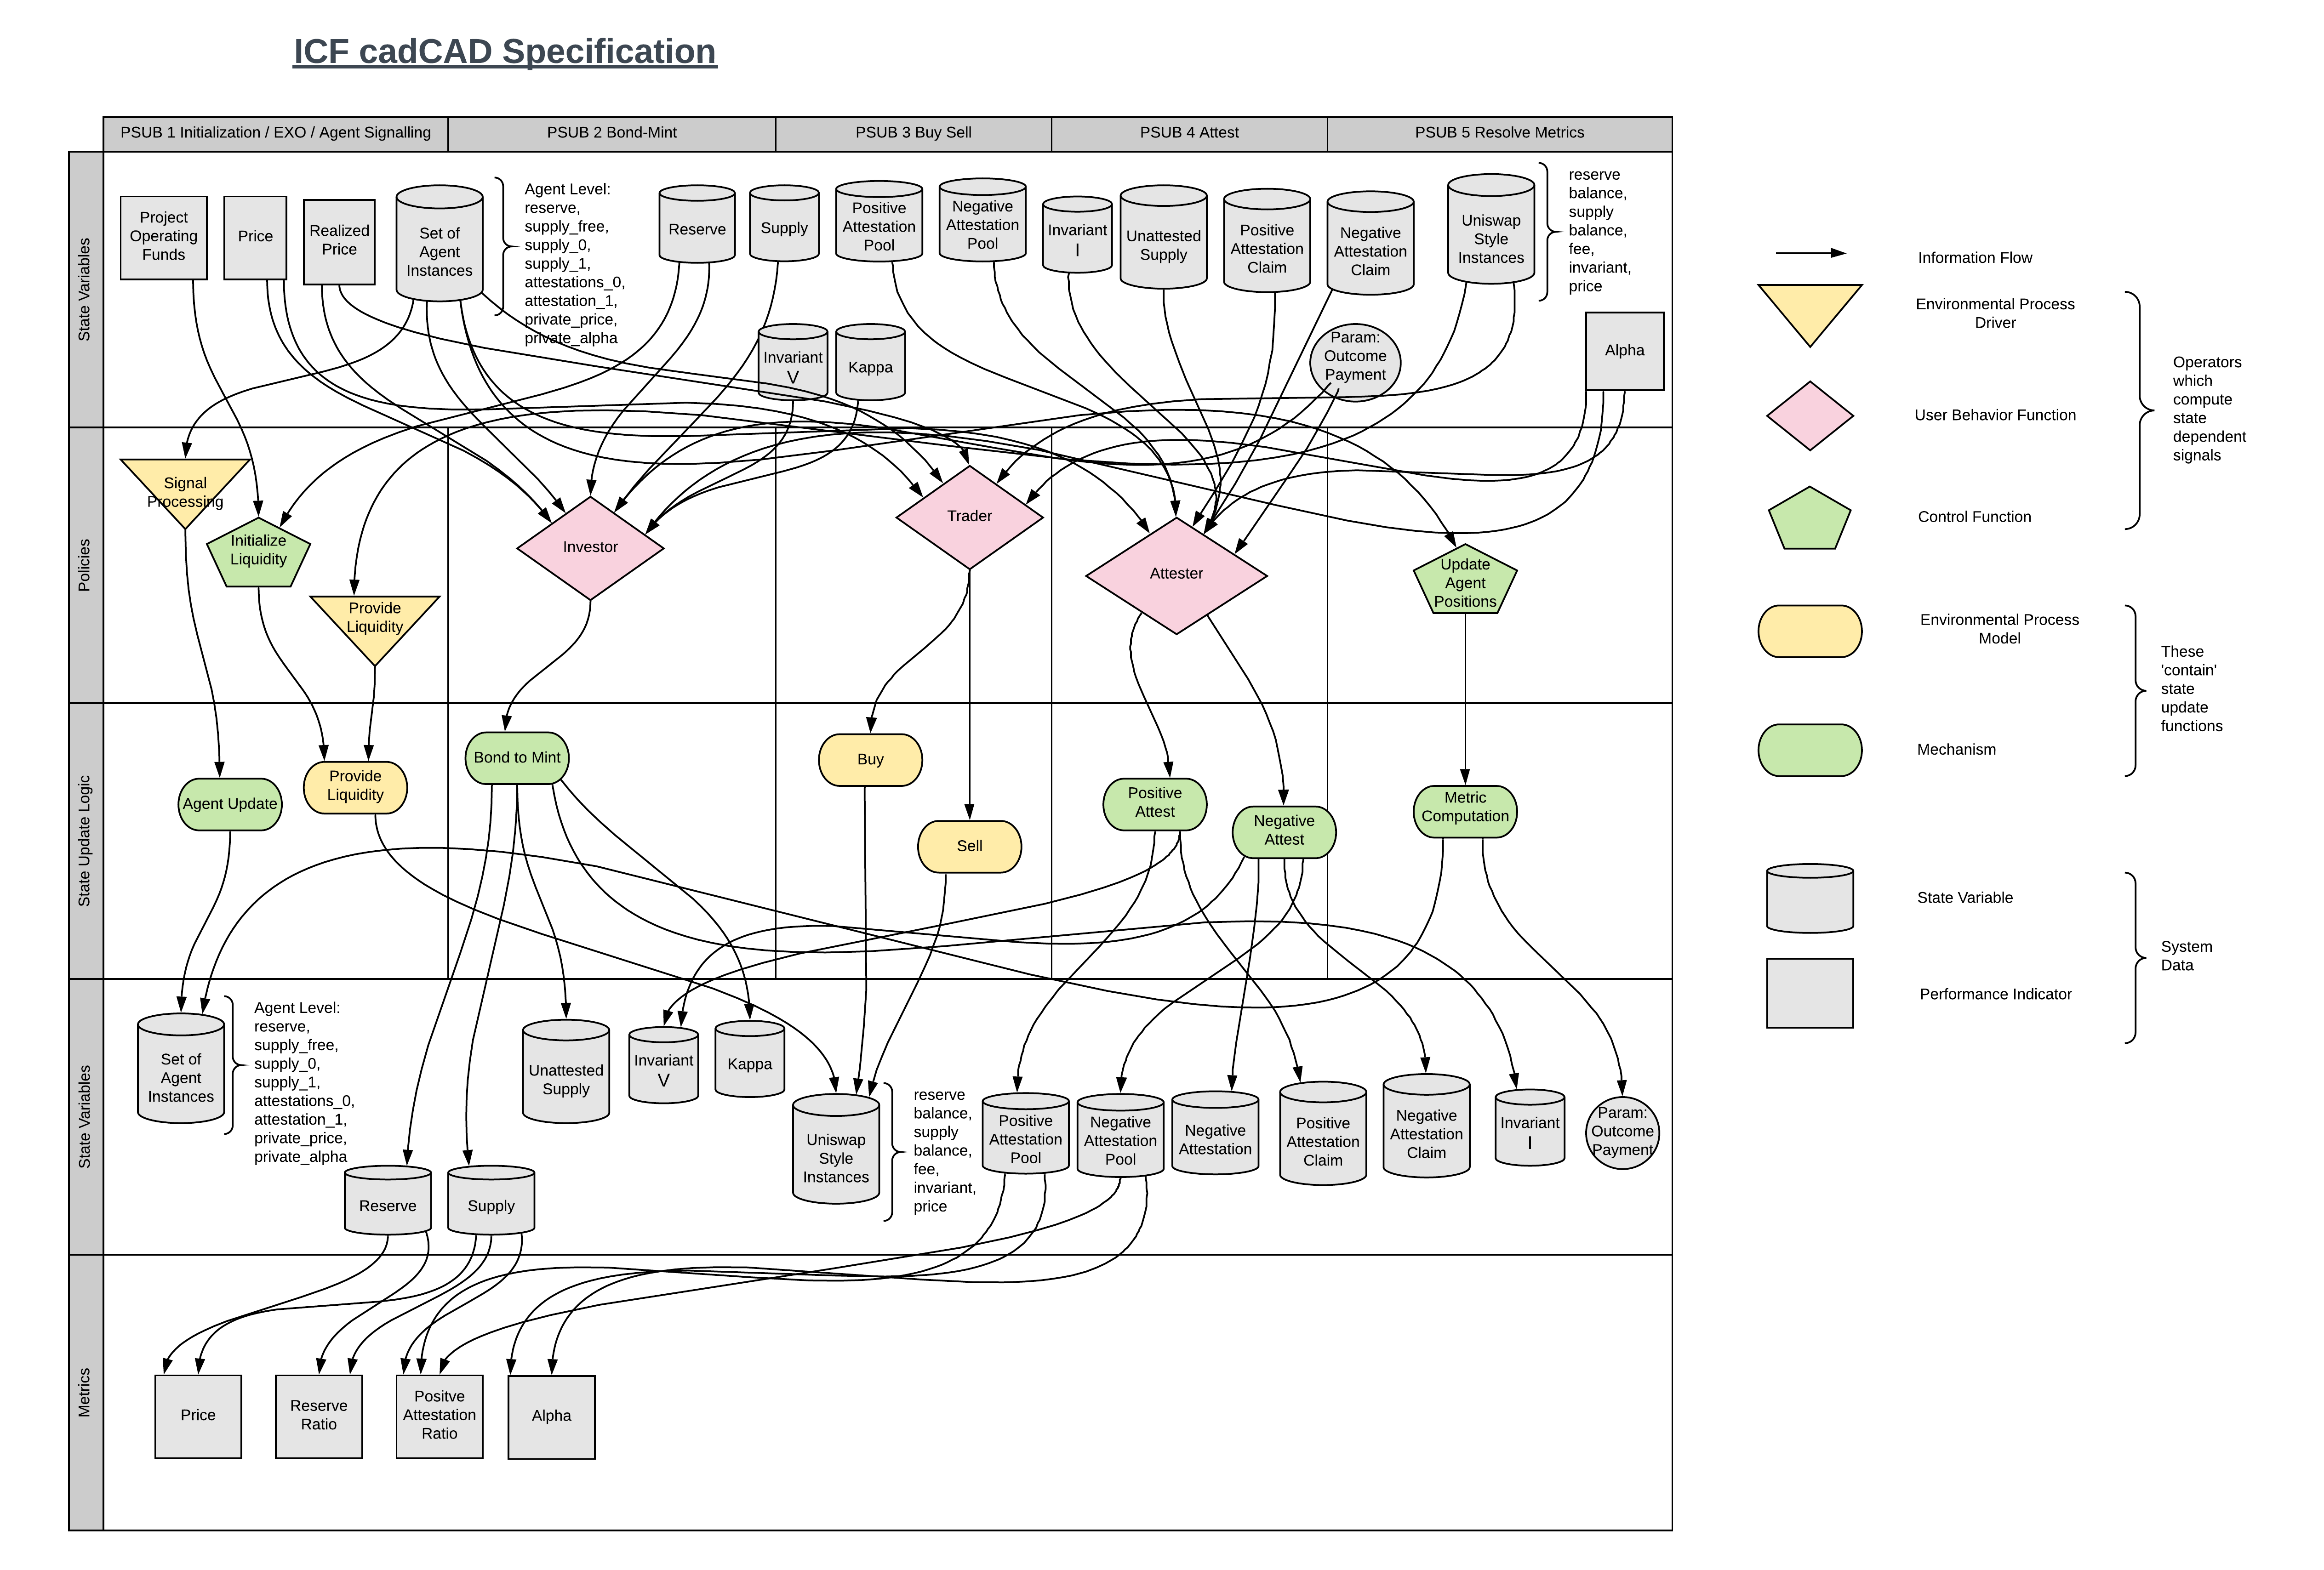

In [3]:
Image("..\images\Phase_3_secondary.png")
# print(sys.path)

### Import Libraries for Analysis and Visualization

In [4]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

### Installed cadCAD Installed Version Check

In [5]:
pip freeze | grep cadCAD

cadCAD==0.4.23
Note: you may need to restart the kernel to use updated packages.


### Import Parent cadCAD Model and Utilities

In [6]:
from cadCAD.configuration import Experiment

from cadCAD import configs

from src.config_wrapper import ConfigWrapper

from src import run_wrapper2
from src import run_wrapper

import src.sim as sim

# custom plotting function
from src.utils import param_test_plot

### Choose number of Monte Carlo runs ('N') and/or number of Timesteps ('T') and/or to update parameter values ('M') 

### Current N, T, and M

In [7]:
# get list of keys and values from M
parametric_experiment = ConfigWrapper(sim)
model_keys = parametric_experiment.get_config()
model_keys[0]

{&#39;N&#39;: 1,
 &#39;T&#39;: range(0, 100),
 &#39;M&#39;: {&#39;starting_kappa&#39;: 2,
  &#39;starting_alpha&#39;: 0.5,
  &#39;money_raised&#39;: 66000,
  &#39;monthly_instalment&#39;: 3000,
  &#39;C&#39;: 72600,
  &#39;f&#39;: 0.03,
  &#39;m&#39;: 0.15,
  &#39;beta&#39;: 0.9,
  &#39;dust&#39;: 1e-08,
  &#39;period&#39;: 1200,
  &#39;rules_price&#39;: &#39;martin&#39;,
  &#39;E&#39;: 0.2,
  &#39;ENABLE_CONTINUOUS&#39;: True,
  &#39;THETA&#39;: 0.9,
  &#39;ENABLE_BURN&#39;: False,
  &#39;fee_numerator&#39;: 997,
  &#39;fee_denominator&#39;: 1000}}

### Choose a parameter and list of values to sweep over

In [8]:
update_params = {
    'ENABLE_BURN' : [False],
    # 'monthly_instalment' : [3000],
    # 'money_raised' : [6000],
    'THETA' : [0.8, 0.85, 0.9, 0.95] 
}

### Update Timesteps, if desired
Current Number of TImesteps

In [9]:
# Original
New_Timesteps = model_keys[0]['T']

# New Change Value
New_Timesteps = range(365)
New_Timesteps

range(0, 365)

### Update Monte Carlo Runs, if desired
Current Number of Runs

In [10]:
# Original
New_Runs = model_keys[0]['N']

# New Change Value
# New_Runs = 10
New_Runs

1

In [11]:
parametric_experiment = ConfigWrapper(sim, M=update_params, N=New_Runs, T=New_Timesteps)

In [12]:
parametric_experiment.get_config()

[{&#39;N&#39;: 1,
  &#39;T&#39;: range(0, 365),
  &#39;M&#39;: {&#39;starting_kappa&#39;: 2,
   &#39;starting_alpha&#39;: 0.5,
   &#39;money_raised&#39;: 66000,
   &#39;monthly_instalment&#39;: 3000,
   &#39;C&#39;: 72600,
   &#39;f&#39;: 0.03,
   &#39;m&#39;: 0.15,
   &#39;beta&#39;: 0.9,
   &#39;dust&#39;: 1e-08,
   &#39;period&#39;: 1200,
   &#39;rules_price&#39;: &#39;martin&#39;,
   &#39;E&#39;: 0.2,
   &#39;ENABLE_CONTINUOUS&#39;: True,
   &#39;THETA&#39;: 0.8,
   &#39;ENABLE_BURN&#39;: False,
   &#39;fee_numerator&#39;: 997,
   &#39;fee_denominator&#39;: 1000}},
 {&#39;N&#39;: 1,
  &#39;T&#39;: range(0, 365),
  &#39;M&#39;: {&#39;starting_kappa&#39;: 2,
   &#39;starting_alpha&#39;: 0.5,
   &#39;money_raised&#39;: 66000,
   &#39;monthly_instalment&#39;: 3000,
   &#39;C&#39;: 72600,
   &#39;f&#39;: 0.03,
   &#39;m&#39;: 0.15,
   &#39;beta&#39;: 0.9,
   &#39;dust&#39;: 1e-08,
   &#39;period&#39;: 1200,
   &#39;rules_price&#39;: &#39;martin&#39;,
   &#39;E&#39;: 0.2,
   &#39;ENABLE_

In [13]:
initial_state = parametric_experiment.get_initial_conditions()

In [14]:
initial_state

{&#39;reserve&#39;: 66000,
 &#39;pbar&#39;: 1,
 &#39;realized_price&#39;: 0,
 &#39;spot_price&#39;: 1,
 &#39;kappa&#39;: 2,
 &#39;supply&#39;: 132000.0,
 &#39;alpha&#39;: 0.5,
 &#39;alpha_bar&#39;: 0.5,
 &#39;supply_0&#39;: 30000,
 &#39;supply_1&#39;: 0,
 &#39;supply_free&#39;: 102000.0,
 &#39;attestations&#39;: 30000,
 &#39;attestations_0&#39;: 30000,
 &#39;attestations_1&#39;: 0,
 &#39;invariant_V&#39;: 264000.0,
 &#39;invariant_I&#39;: 102300.0,
 &#39;agents&#39;:     id  agent_attestations_1  agent_attestations_0  agent_reserve  \
 0    0                     0                     0            100   
 1    1                     0                     0            100   
 2    2                     0                     0            100   
 3    3                     0                     0            100   
 4    4                     0                     0            100   
 5    5                     0                     0            100   
 6    6                     0          

In [15]:

del configs[:]

parametric_experiment.append()

&lt;cadCAD.configuration.Experiment at 0x1b40e12afc8&gt;

In [16]:
parametric_experiment.get_config()

[{&#39;N&#39;: 1,
  &#39;T&#39;: range(0, 365),
  &#39;M&#39;: {&#39;starting_kappa&#39;: 2,
   &#39;starting_alpha&#39;: 0.5,
   &#39;money_raised&#39;: 66000,
   &#39;monthly_instalment&#39;: 3000,
   &#39;C&#39;: 72600,
   &#39;f&#39;: 0.03,
   &#39;m&#39;: 0.15,
   &#39;beta&#39;: 0.9,
   &#39;dust&#39;: 1e-08,
   &#39;period&#39;: 1200,
   &#39;rules_price&#39;: &#39;martin&#39;,
   &#39;E&#39;: 0.2,
   &#39;ENABLE_CONTINUOUS&#39;: True,
   &#39;THETA&#39;: 0.8,
   &#39;ENABLE_BURN&#39;: False,
   &#39;fee_numerator&#39;: 997,
   &#39;fee_denominator&#39;: 1000}},
 {&#39;N&#39;: 1,
  &#39;T&#39;: range(0, 365),
  &#39;M&#39;: {&#39;starting_kappa&#39;: 2,
   &#39;starting_alpha&#39;: 0.5,
   &#39;money_raised&#39;: 66000,
   &#39;monthly_instalment&#39;: 3000,
   &#39;C&#39;: 72600,
   &#39;f&#39;: 0.03,
   &#39;m&#39;: 0.15,
   &#39;beta&#39;: 0.9,
   &#39;dust&#39;: 1e-08,
   &#39;period&#39;: 1200,
   &#39;rules_price&#39;: &#39;martin&#39;,
   &#39;E&#39;: 0.2,
   &#39;ENABLE_

### Generate config_ids to match results with swept variable input

In [17]:
def get_M(k, v):
    if k == 'sim_config':
        k, v = 'M', v['M']
    return k, v

config_ids = [
    dict(
        get_M(k, v) for k, v in config.__dict__.items() if k in ['simulation_id', 'run_id', 'sim_config', 'subset_id']
    ) for config in configs
]

In [18]:
config_ids

[{&#39;M&#39;: {&#39;starting_kappa&#39;: 2,
   &#39;starting_alpha&#39;: 0.5,
   &#39;money_raised&#39;: 66000,
   &#39;monthly_instalment&#39;: 3000,
   &#39;C&#39;: 72600,
   &#39;f&#39;: 0.03,
   &#39;m&#39;: 0.15,
   &#39;beta&#39;: 0.9,
   &#39;dust&#39;: 1e-08,
   &#39;period&#39;: 1200,
   &#39;rules_price&#39;: &#39;martin&#39;,
   &#39;E&#39;: 0.2,
   &#39;ENABLE_CONTINUOUS&#39;: True,
   &#39;THETA&#39;: 0.8,
   &#39;ENABLE_BURN&#39;: False,
   &#39;fee_numerator&#39;: 997,
   &#39;fee_denominator&#39;: 1000},
  &#39;simulation_id&#39;: 0,
  &#39;run_id&#39;: 0,
  &#39;subset_id&#39;: 0},
 {&#39;M&#39;: {&#39;starting_kappa&#39;: 2,
   &#39;starting_alpha&#39;: 0.5,
   &#39;money_raised&#39;: 66000,
   &#39;monthly_instalment&#39;: 3000,
   &#39;C&#39;: 72600,
   &#39;f&#39;: 0.03,
   &#39;m&#39;: 0.15,
   &#39;beta&#39;: 0.9,
   &#39;dust&#39;: 1e-08,
   &#39;period&#39;: 1200,
   &#39;rules_price&#39;: &#39;martin&#39;,
   &#39;E&#39;: 0.2,
   &#39;ENABLE_CONTINUOUS&#39;: 

### Execute cadCAD Simulation

In [19]:
(data, tensor_field, sessions) = run_wrapper.run(drop_midsteps=True)

experiments = data


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (365, 17, 4, 22)
Execution Method: local_simulations
SimIDs   : [0, 0, 0, 0]
SubsetIDs: [0, 1, 2, 3]
Ns       : [0, 1, 2, 3]
ExpIDs   : [0, 0, 0, 0]
Execution Mode: parallelized
Total execution time: 8.89s


In [20]:
experiments.head()

index  reserve  pbar  realized_price  spot_price  kappa    supply  alpha  \
0      0  66000.0   1.0               0       1.000   2.00  132000.0    0.5   
1      6  66000.0   0.0               0       0.775   1.55  132000.0    0.5   
2     12  66000.0   0.0               0       0.775   1.55  132000.0    0.5   
3     18  66000.0   0.0               0       0.775   1.55  132000.0    0.5   
4     24  66000.0   0.0               0       0.775   1.55  132000.0    0.5   

   alpha_bar  supply_0  ...  \
0        0.5     30000  ...   
1        0.5     30000  ...   
2        0.5     30000  ...   
3        0.5     30000  ...   
4        0.5     30000  ...   

                                        chosen_agent  public_alpha  \
0                                                  0             0   
1  {&#39;id&#39;: 9, &#39;agent_attestations_1&#39;: 0, &#39;agent_at...             0   
2  {&#39;id&#39;: 1.0, &#39;agent_attestations_1&#39;: 0.0, &#39;agen...             0   
3  {&#39;id&#39;: 16.0, &#39;agent_attestations_1&#39;: 0.0, &#39;age...             0   
4  {&#39;id&#39;: 4.0, &#39;agent_attestations_1&#39;: 0.0, &#39;agen...             0   

   funds_from_bond  UNI_supply  UNI_reserve  simulation  subset run substep  \
0              0.0    132000.0        66000           0       0   1       0   
1              0.0    132000.0        66000           0       0   1       6   
2              0.0    132000.0        66000           0       0   1       6   
3              0.0    132000.0        66000           0       0   1       6   
4              0.0    132000.0        66000           0       0   1       6   

   timestep  
0         0  
1         1  
2         2  
3         3  
4         4  

[5 rows x 28 columns]

In [21]:
experiments.tail()

index  reserve           pbar  realized_price  spot_price    kappa  \
1459   8739  66100.0 -8.589935e-101               0    0.764827  1.56326   
1460   8745  66100.0 -8.589935e-117               0    0.764827  1.56326   
1461   8751  66100.0  -8.589935e-77               0    0.764827  1.56326   
1462   8757  66100.0  -8.589935e-93               0    0.764827  1.56326   
1463   8763  66100.0  -8.589935e-93               0    0.764827  1.56326   

             supply     alpha  alpha_bar  supply_0  ...  \
1459  135104.359636  0.512831        0.5     30000  ...   
1460  135104.359636  0.512831        0.5     30000  ...   
1461  135104.359636  0.512831        0.5     30000  ...   
1462  135104.359636  0.512831        0.5     30000  ...   
1463  135104.359636  0.512831        0.5     30000  ...   

                                           chosen_agent  public_alpha  \
1459  {&#39;id&#39;: 11.0, &#39;agent_attestations_1&#39;: 0.0, &#39;age...             0   
1460  {&#39;id&#39;: 8.0, &#39;agent_attestations_1&#39;: 0.0, &#39;agen...             0   
1461  {&#39;id&#39;: 3.0, &#39;agent_attestations_1&#39;: 0.0, &#39;agen...             0   
1462  {&#39;id&#39;: 15.0, &#39;agent_attestations_1&#39;: 0.0, &#39;age...             0   
1463  {&#39;id&#39;: 17.0, &#39;agent_attestations_1&#39;: 0.0, &#39;age...             0   

      funds_from_bond  UNI_supply  UNI_reserve  simulation  subset run  \
1459          43900.0    132000.0        66000           0       3   3   
1460          43900.0    132000.0        66000           0       3   3   
1461          43900.0    132000.0        66000           0       3   3   
1462          43900.0    132000.0        66000           0       3   3   
1463          43900.0    132000.0        66000           0       3   3   

     substep  timestep  
1459       6       361  
1460       6       362  
1461       6       363  
1462       6       364  
1463       6       365  

[5 rows x 28 columns]

In [22]:
len(experiments)

1464

### Bonded funds are split into backing the bond (into reserve fund) and backing the project (funds_from_bond).

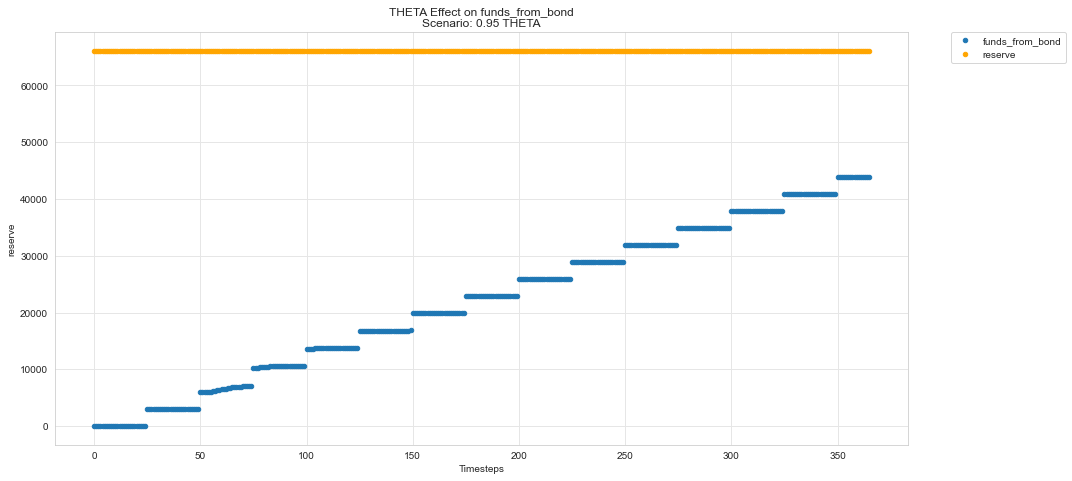

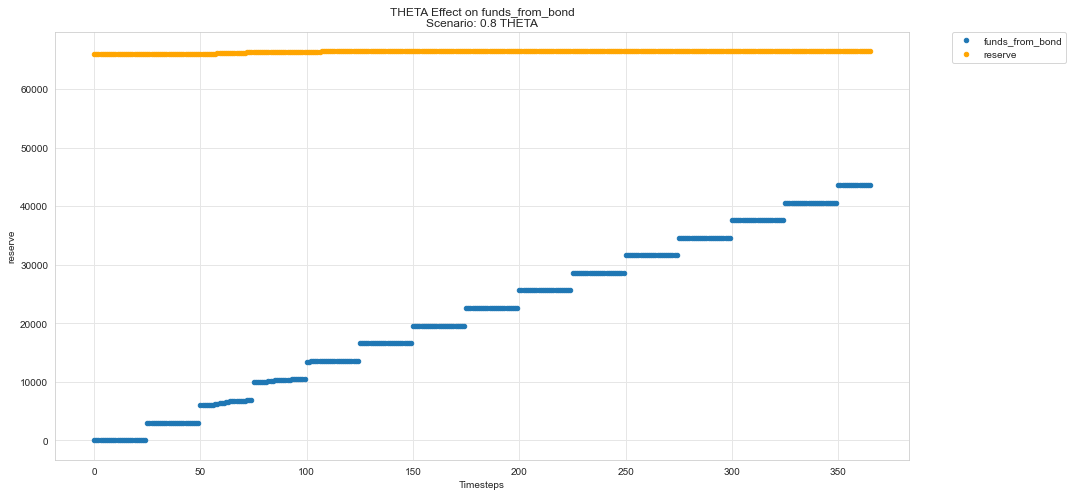

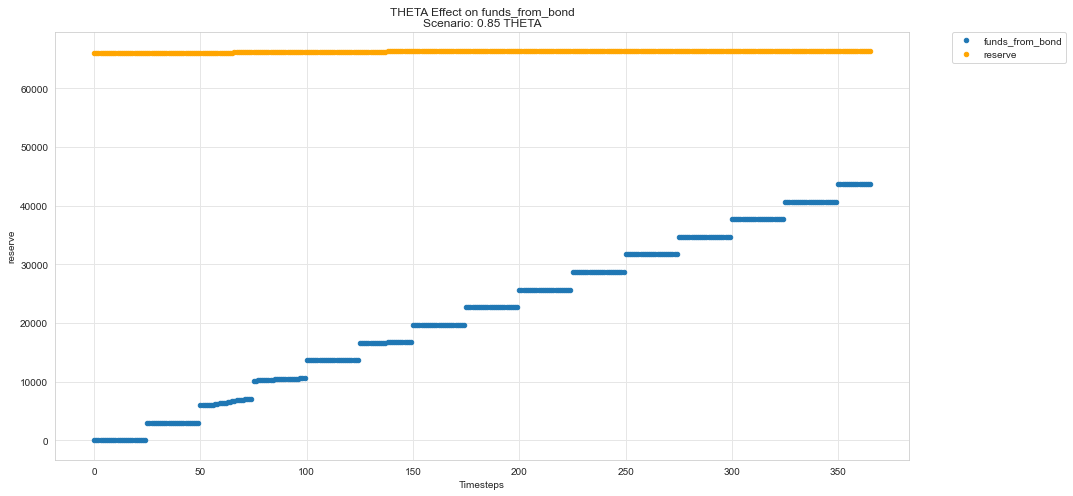

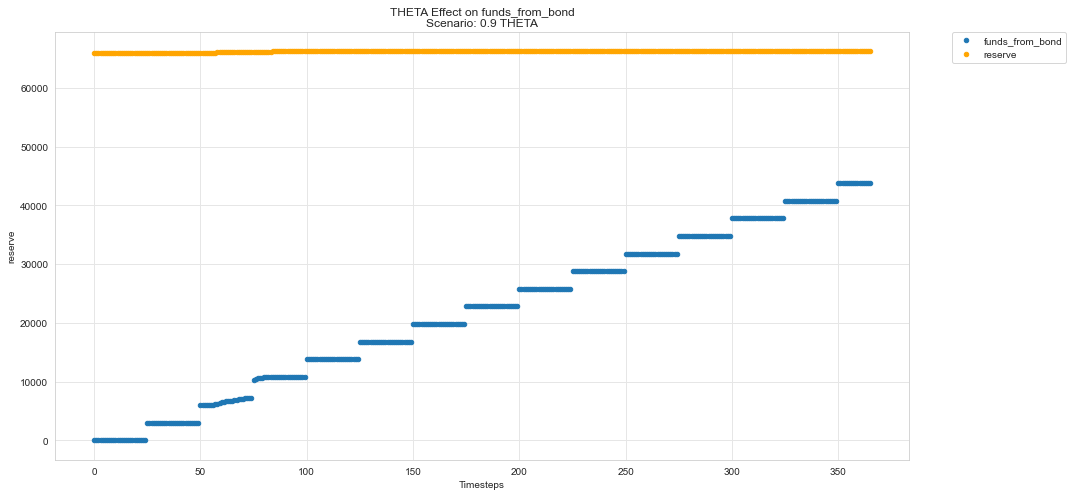

In [23]:
param_test_plot(experiments, config_ids, 'THETA','funds_from_bond', 'reserve')

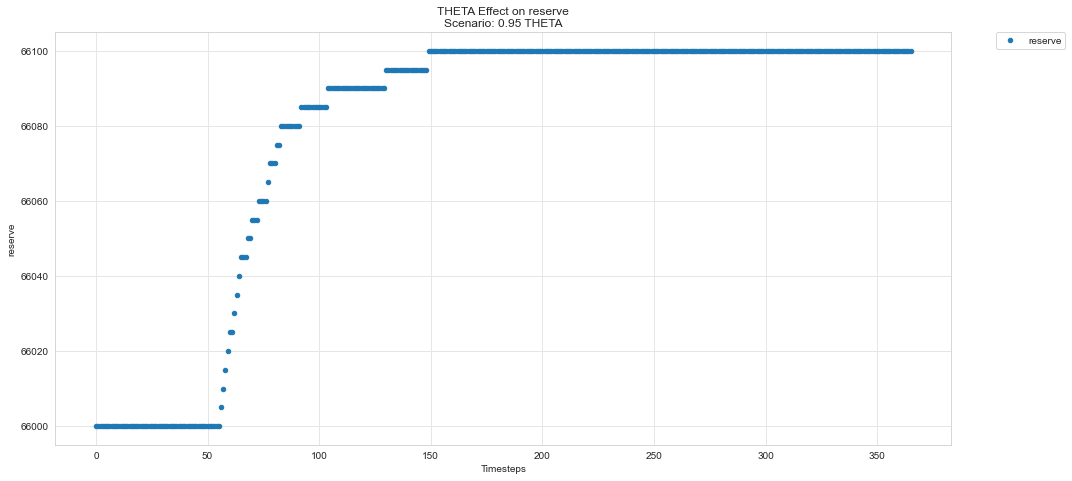

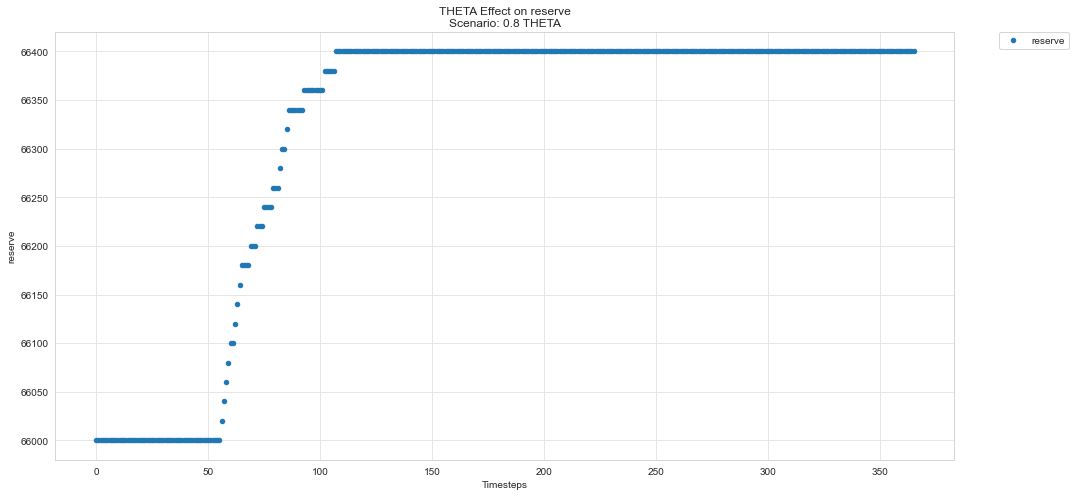

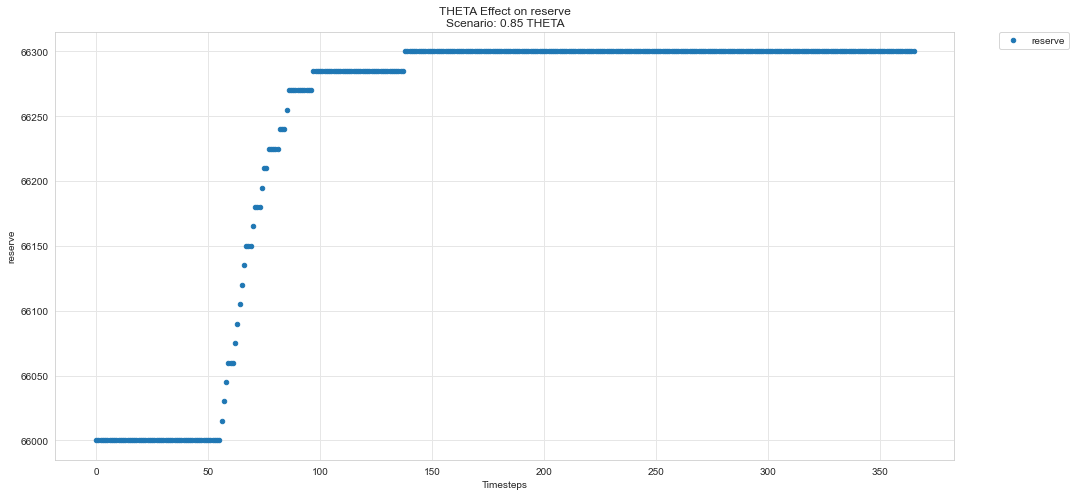

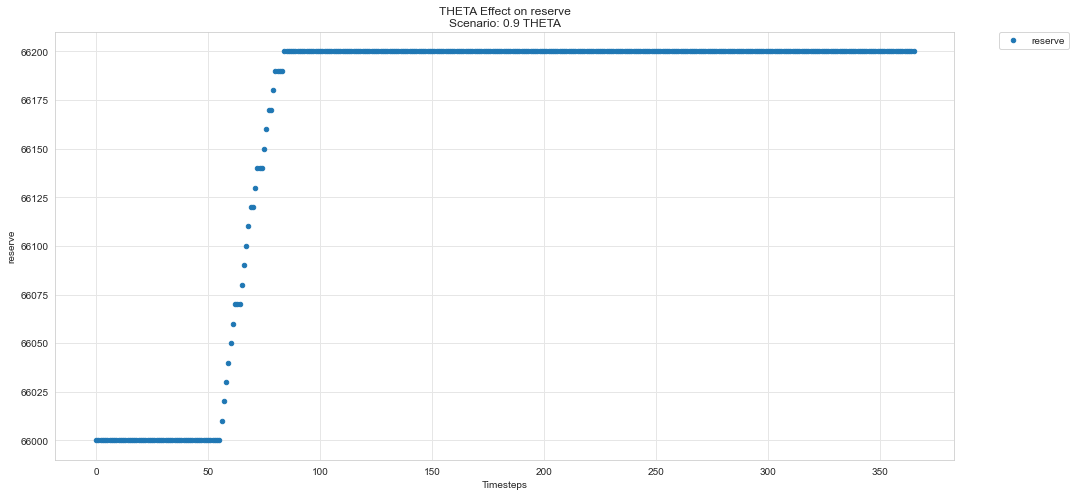

In [24]:
param_test_plot(experiments, config_ids, 'THETA', 'reserve')

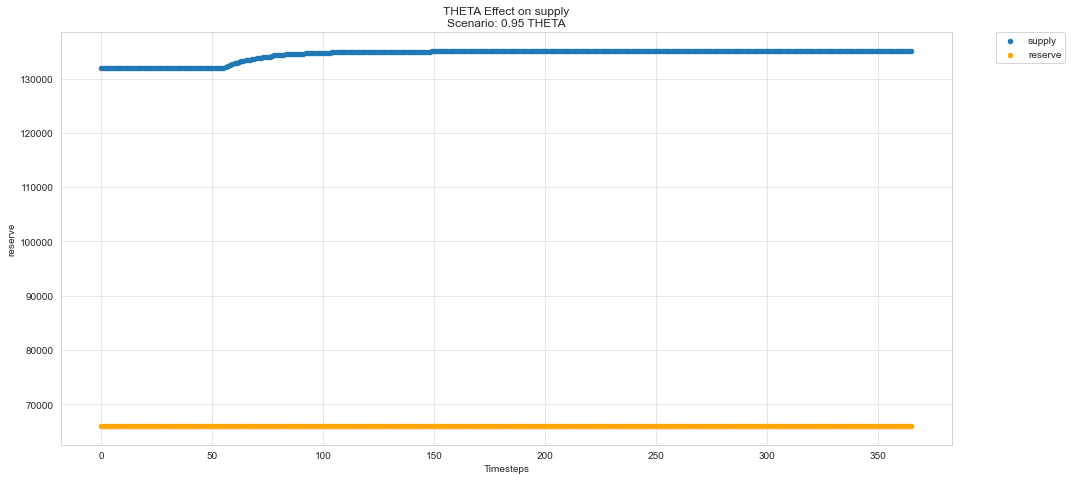

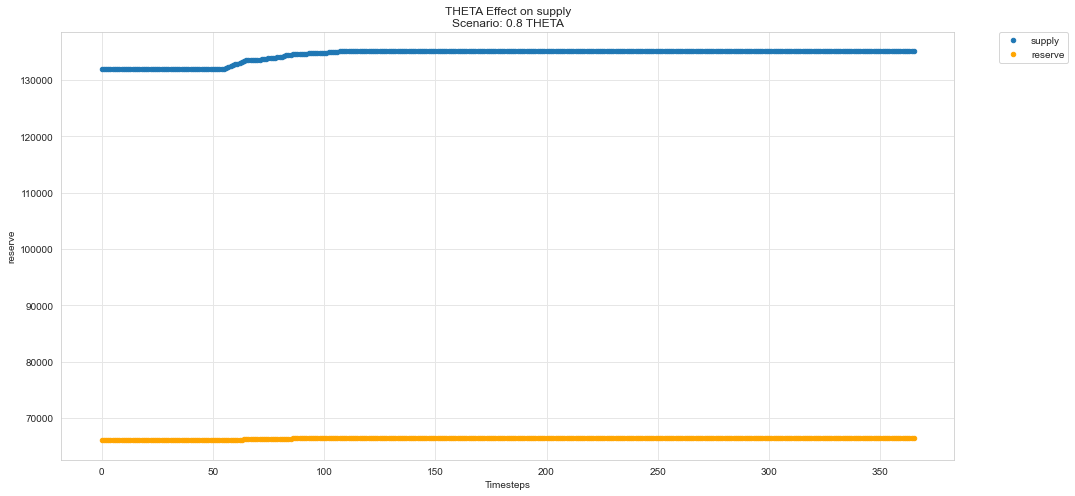

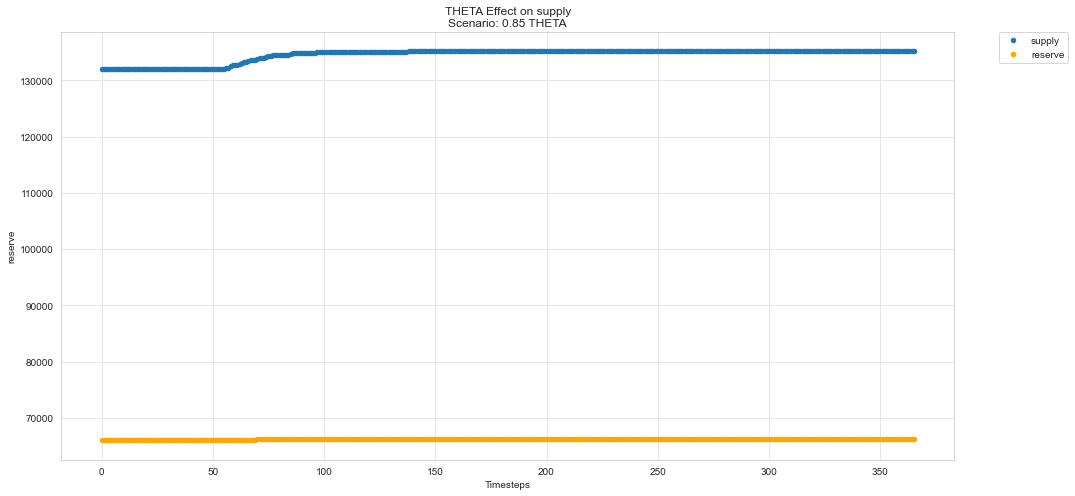

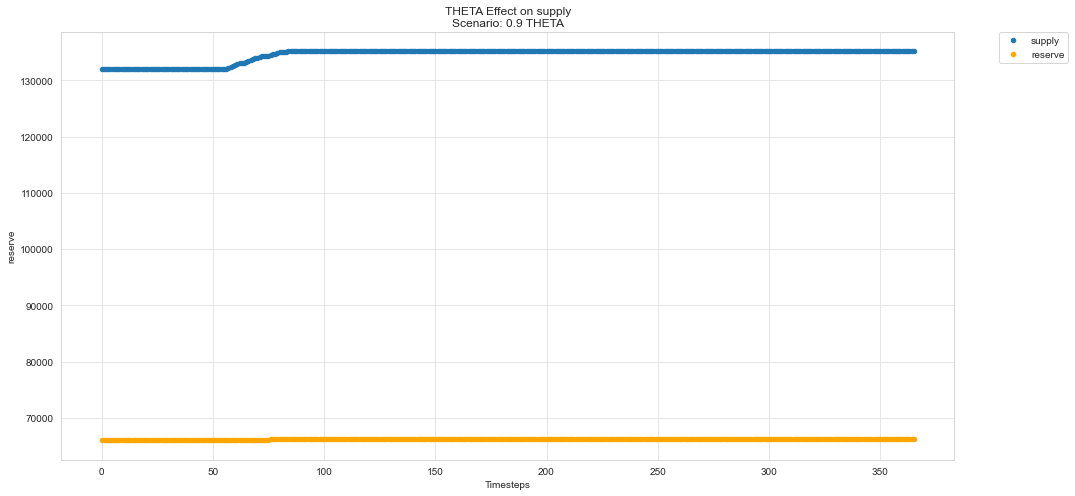

In [25]:
param_test_plot(experiments, config_ids, 'THETA','supply', 'reserve')

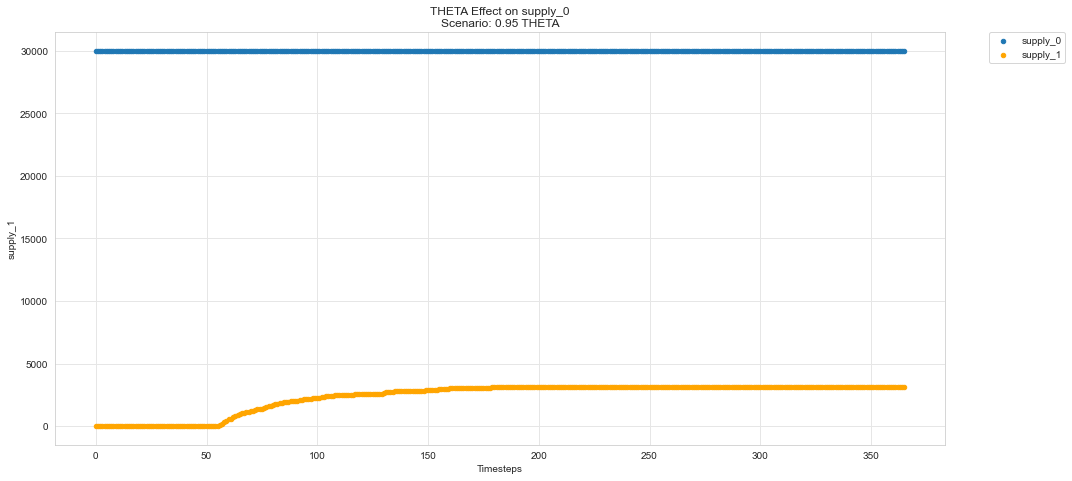

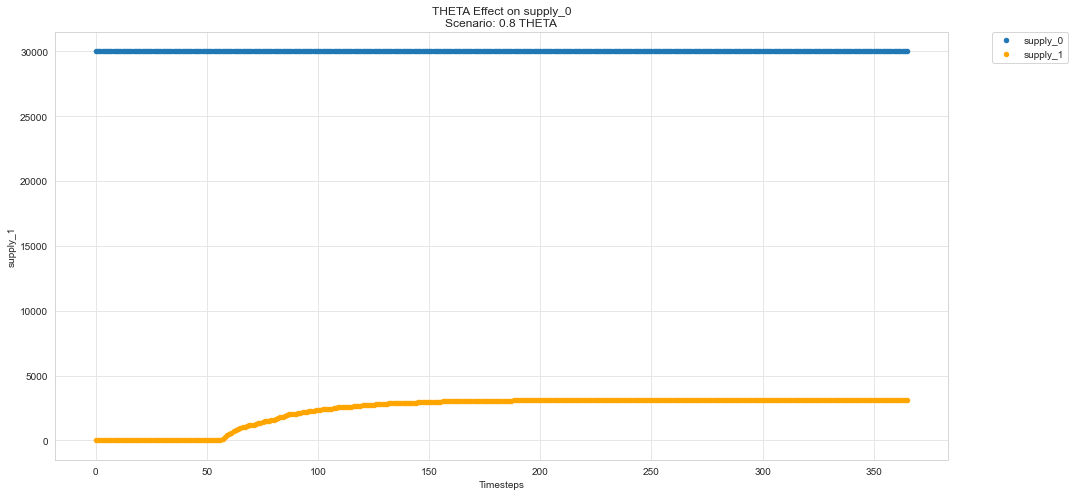

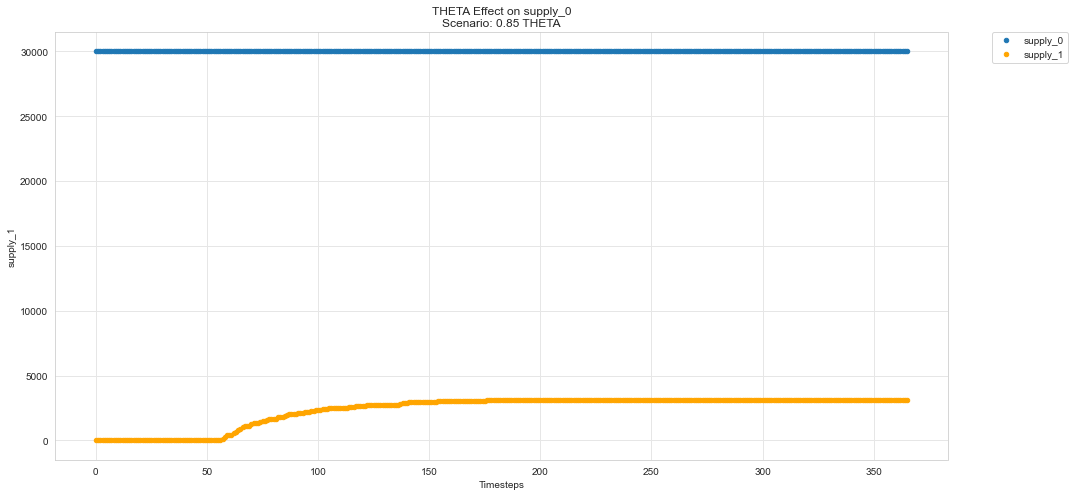

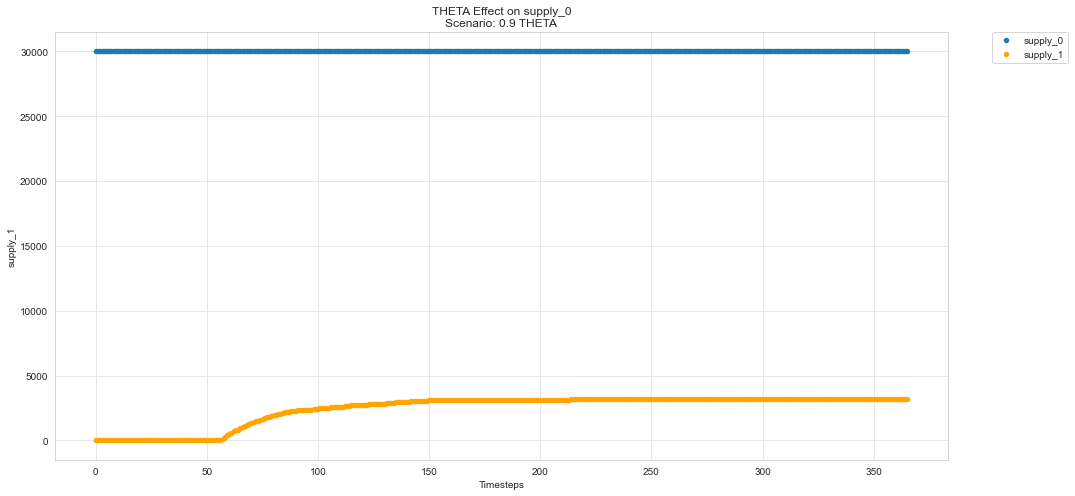

In [26]:
param_test_plot(experiments, config_ids, 'THETA','supply_0', 'supply_1')

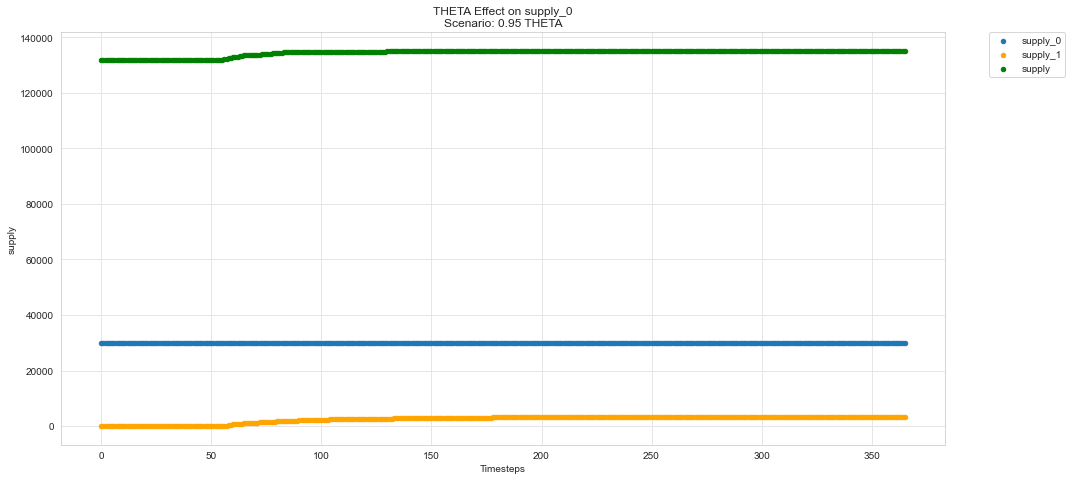

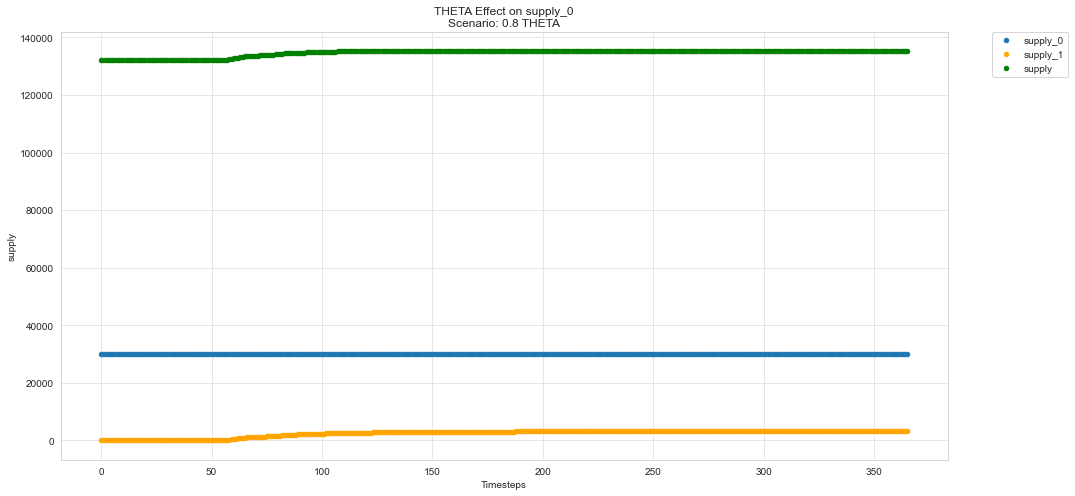

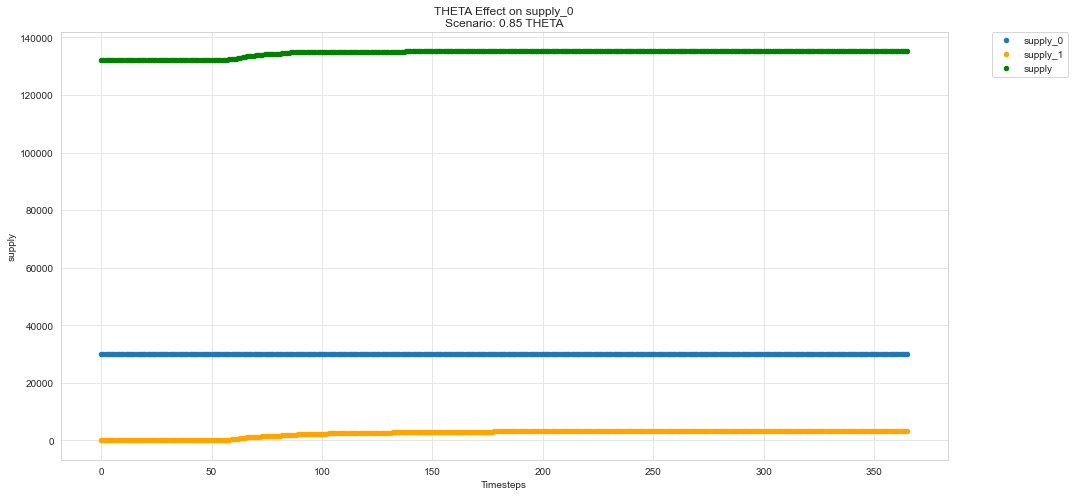

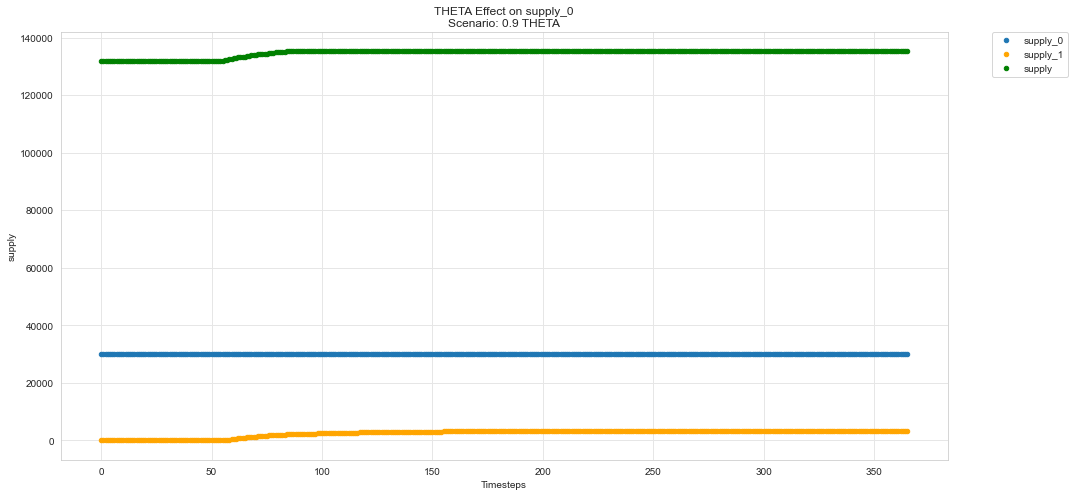

In [27]:
param_test_plot(experiments, config_ids, 'THETA','supply_0', 'supply_1', 'supply')

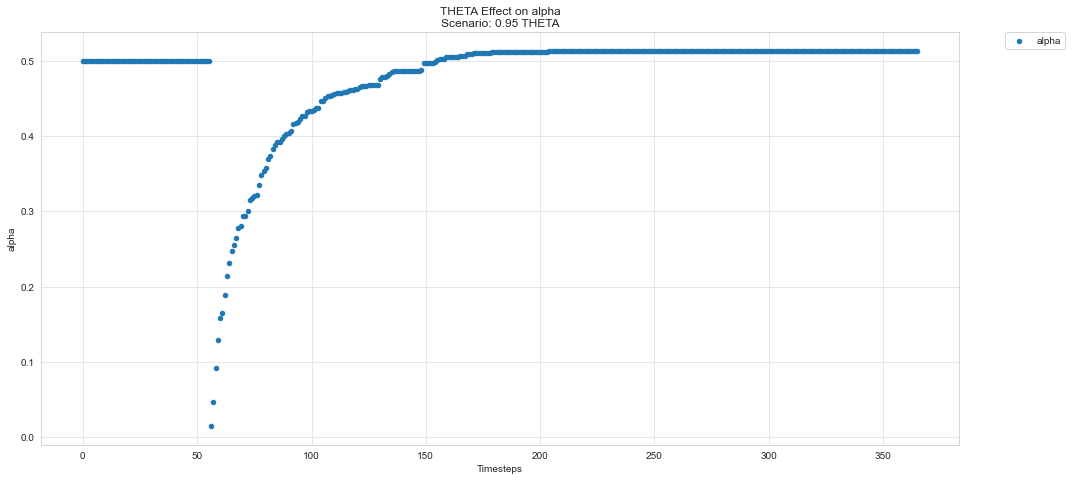

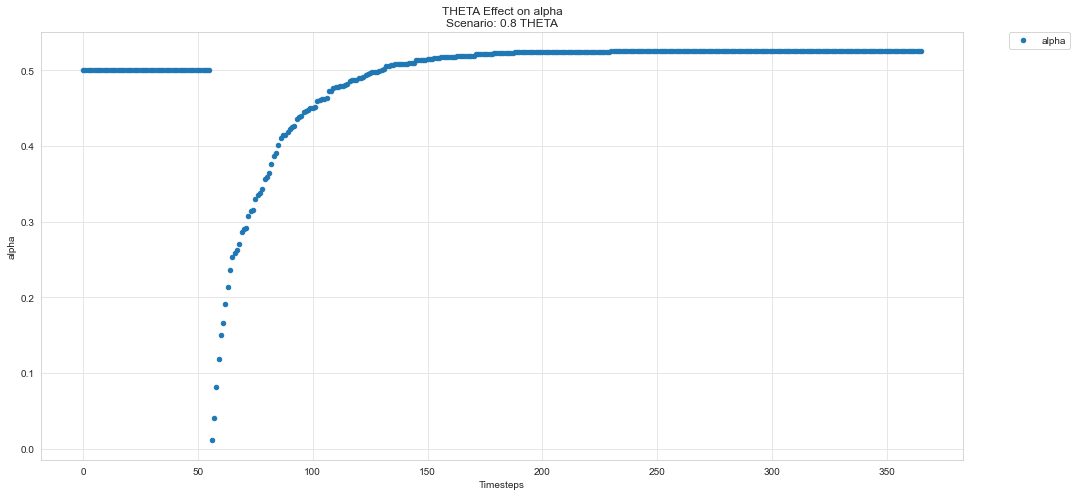

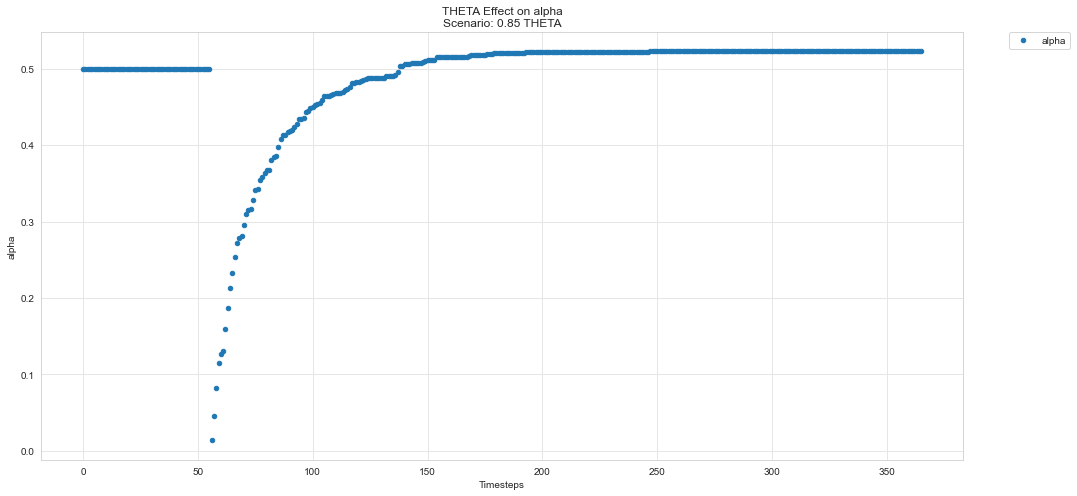

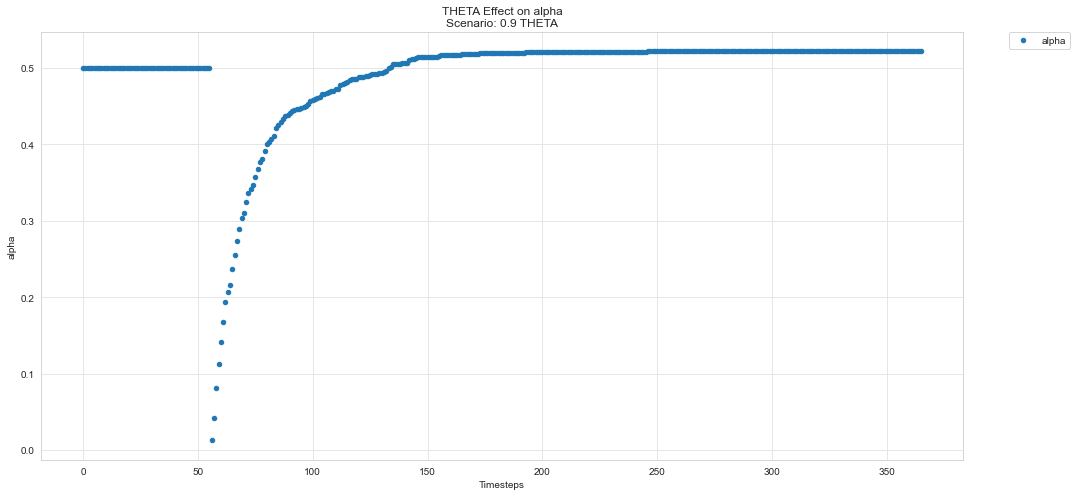

In [28]:
param_test_plot(experiments, config_ids, 'THETA','alpha')

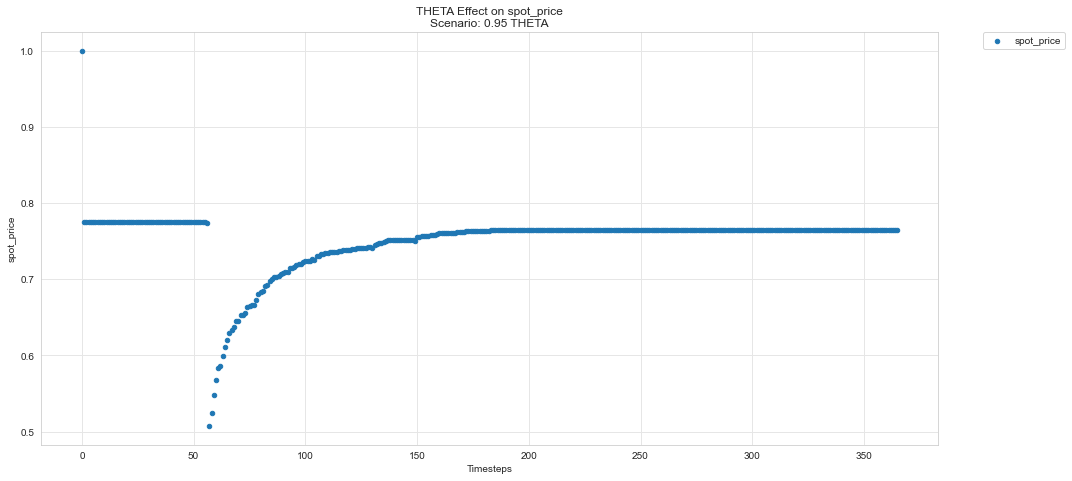

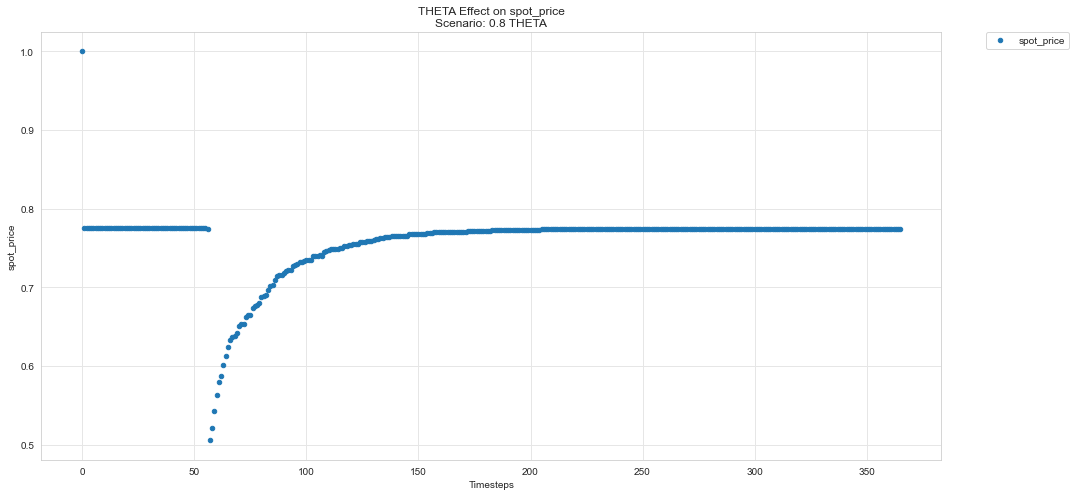

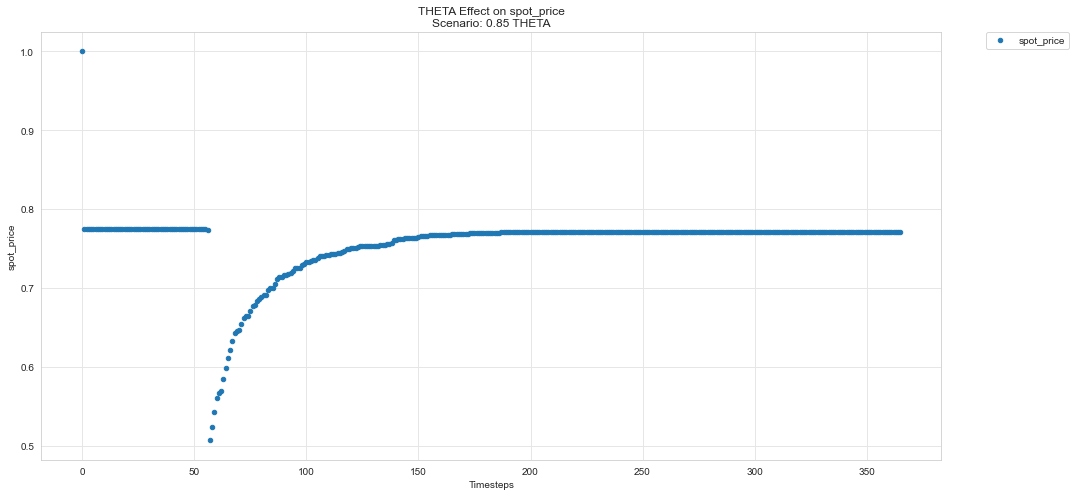

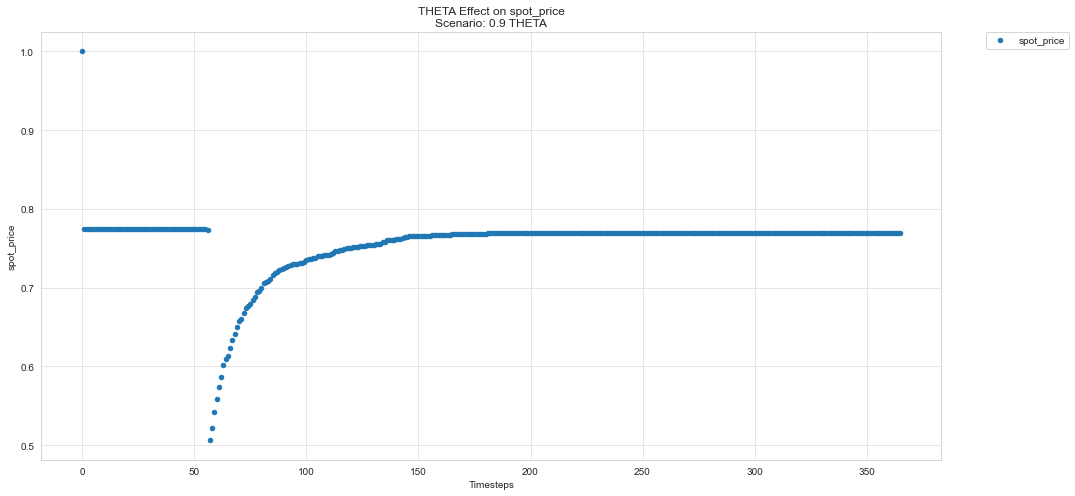

In [29]:
param_test_plot(experiments, config_ids, 'THETA', 'spot_price')

### Use for customizing plots

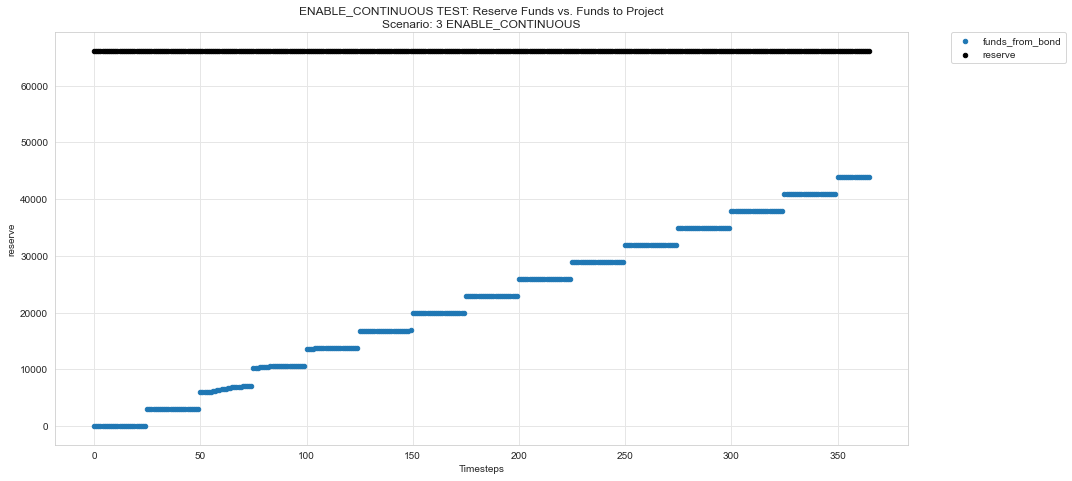

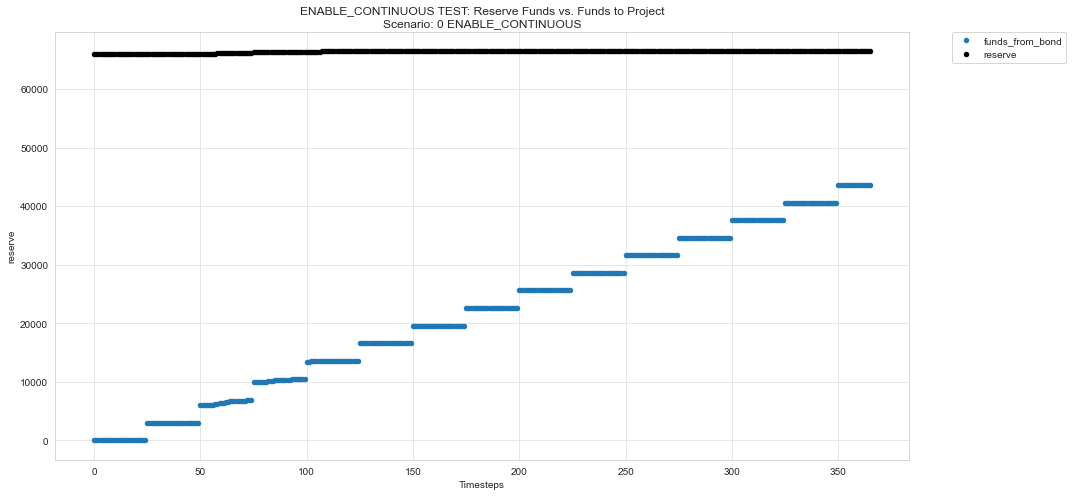

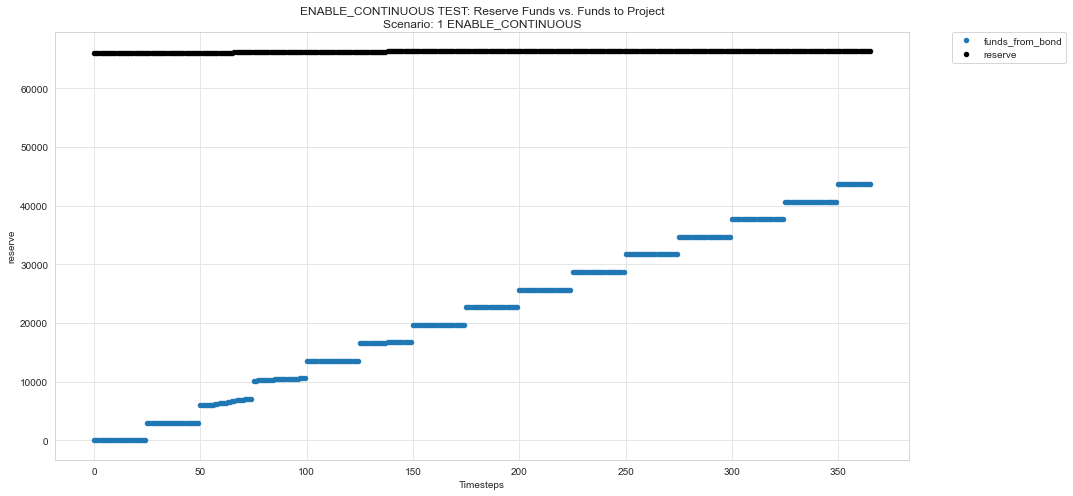

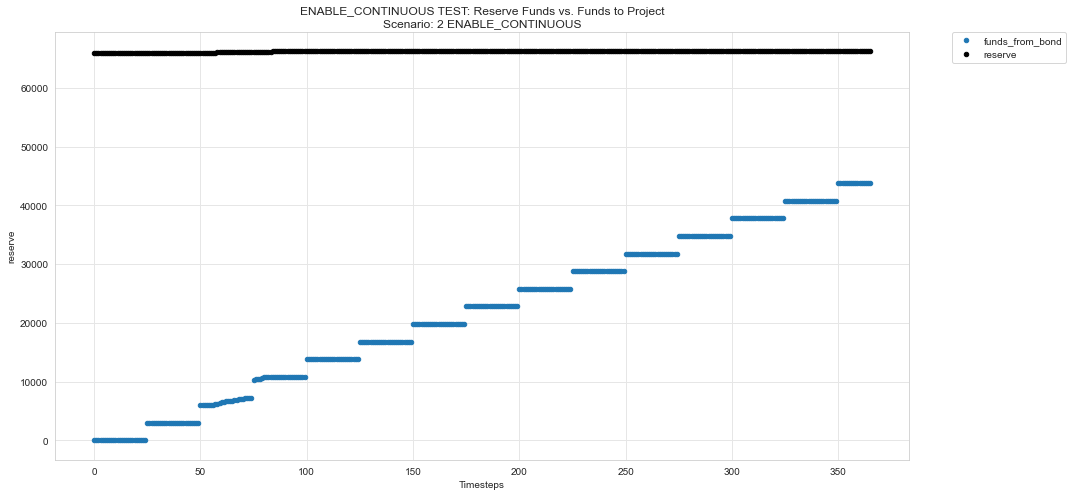

In [31]:
experiments = experiments.sort_values(by =['subset']).reset_index(drop=True)
cols = 1
rows = 1
cc_idx = 0
while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['subset']
    cc_label = experiments.iloc[cc_idx]['subset']
#     secondary_label = experiments.iloc[cc_idx]['string']
    sub_experiments = experiments[experiments['subset']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))

    df = sub_experiments.copy()
    colors = ['b','orange', 'g', 'magenta', 'r', 'k' ]

    ax = axs
    title = 'ENABLE_CONTINUOUS TEST: Reserve Funds vs. Funds to Project' + '\n' + 'Scenario: ' + str(cc_label)  + ' ENABLE_CONTINUOUS'
    # + 'Scenario: ' + str(cc_label)  + ' rules_price'
    ax.set_title(title)
    ax.set_ylabel('Funds')

    df.plot(x='timestep', y='funds_from_bond', label='funds_from_bond', ax=ax, legend=True, kind ='scatter')
    df.plot(x='timestep', y='reserve', label='reserve', ax=ax, legend=True, color = colors[5], kind ='scatter')

    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    ax.set_xlabel('Timesteps')
    ax.grid(color='0.9', linestyle='-', linewidth=1)

    plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()